In [1]:
!unzip /content/winequality-red.zip

Archive:  /content/winequality-red.zip
  inflating: winequality-red.csv     


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
training = pd.read_csv('/content/winequality-red.csv', sep=';')
training.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


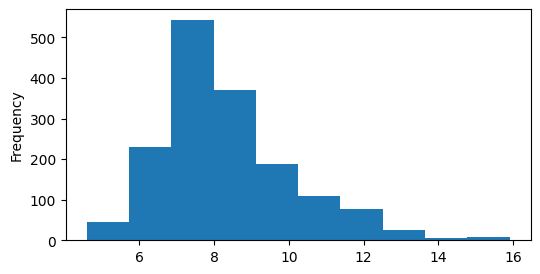

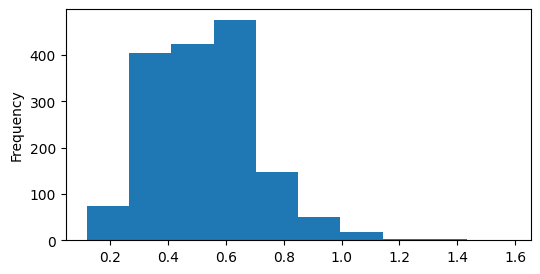

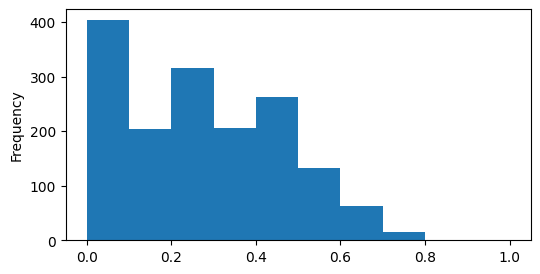

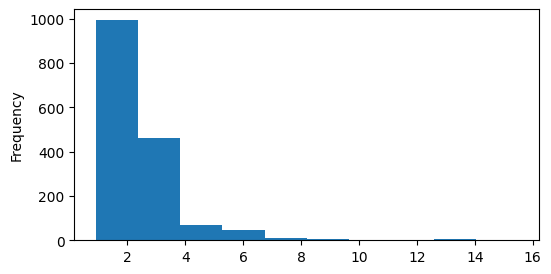

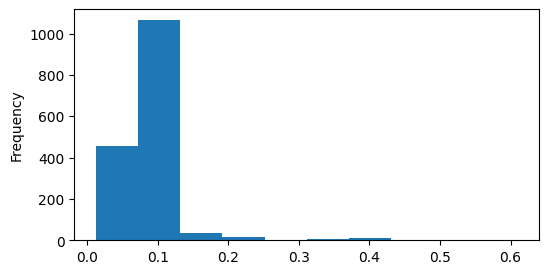

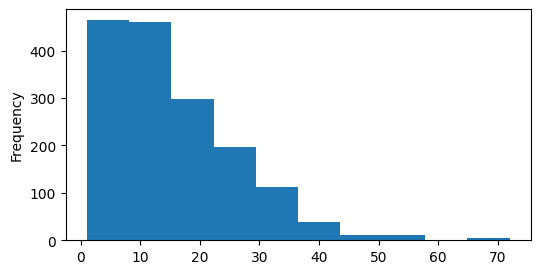

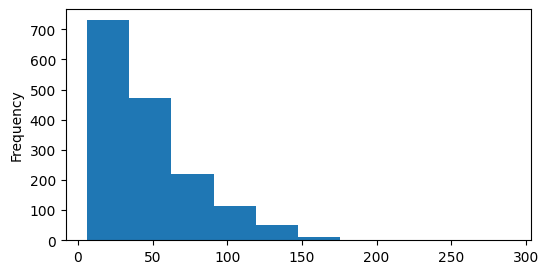

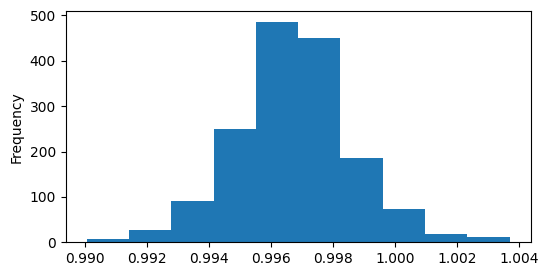

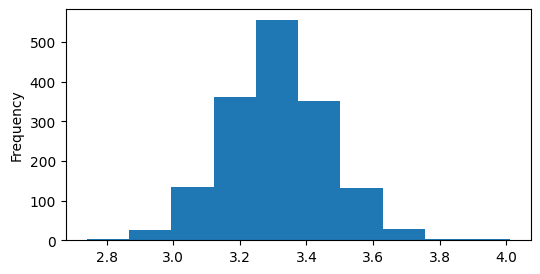

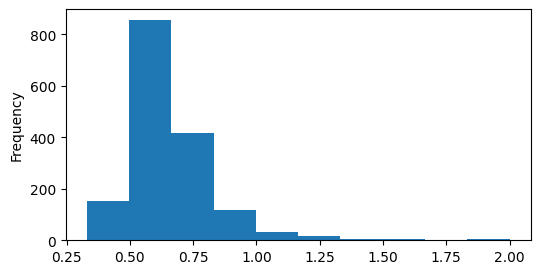

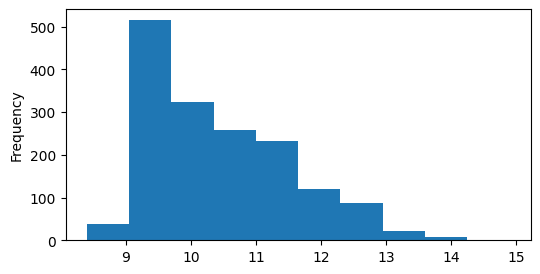

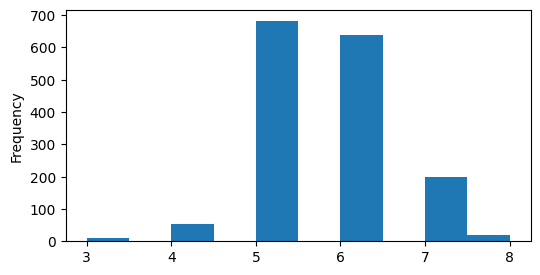

In [4]:
for item in training.columns:
  plt.figure(figsize=(6, 3))
  training[item].plot.hist()

In [5]:
training.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [6]:
training.quality.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1599 non-null   int64
dtypes: int64(1)
memory usage: 12.6 KB


In [7]:
training.quality = training.quality.astype(float)

In [8]:
# 'bad wine' if training.quality < 6.5 else 'good wine'
training.loc[(training.quality < 6.5), 'quality2'] = 0 #'bad wine'
training.loc[(training.quality >= 6.5), 'quality2'] = 1 #'good wine'
training.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
568,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.9990,3.31,0.79,10.7,6.0,0.0
1428,7.8,0.64,0.00,1.9,0.072,27.0,55.0,0.9962,3.31,0.63,11.0,5.0,0.0


In [9]:
features = list(training.columns)
features.remove('quality')
features.remove('quality2')
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [10]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
 12  quality2              1599 non-null   float64
dtypes: float64(13)
memory usage: 162.5 KB


In [11]:
training.isnull().any().sum()

0

In [12]:
# масштабирование данных
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(training[features])

y_train = training.quality2.astype(int)

In [13]:
y_train.unique()

array([0, 1])

In [14]:
X_train_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5, error_score='raise', scoring='accuracy')
print(cv)
print(cv.mean())

[0.878125   0.85       0.896875   0.853125   0.86833856]
0.8692927115987461


In [16]:
from sklearn.metrics import confusion_matrix

svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_train_scaled)
confusion_matrix(y_train, y_pred)

array([[1363,   19],
       [ 143,   74]])

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      1382
           1       0.80      0.34      0.48       217

    accuracy                           0.90      1599
   macro avg       0.85      0.66      0.71      1599
weighted avg       0.89      0.90      0.88      1599



In [18]:
# C_2d_range = [1e-2, 1, 1e2]
# gamma_2d_range = [1e-1, 1, 1e1]
# classifiers = []
# for C in C_2d_range:
#     for gamma in gamma_2d_range:
#         clf = SVC(C=C, gamma=gamma)
#         clf.fit(X_2d, y_2d)
#         classifiers.append((C, gamma, clf))

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1], # , 10, 100, 1000
              'gamma': [1, 0.1], # , 0.01, 0.001, 0.0001
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)

# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [20]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [21]:

grid_predictions = grid.predict(X_train_scaled)

# print classification report
print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1382
           1       0.99      0.88      0.93       217

    accuracy                           0.98      1599
   macro avg       0.99      0.94      0.96      1599
weighted avg       0.98      0.98      0.98      1599

